In [22]:
from main import *
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

sns.set_style('whitegrid')

# Aeroportos analisados

A partir dos 12 aeroportos fornecidos, foram adquiradas as coordenadas de cada um deles para o calculo da distancia 

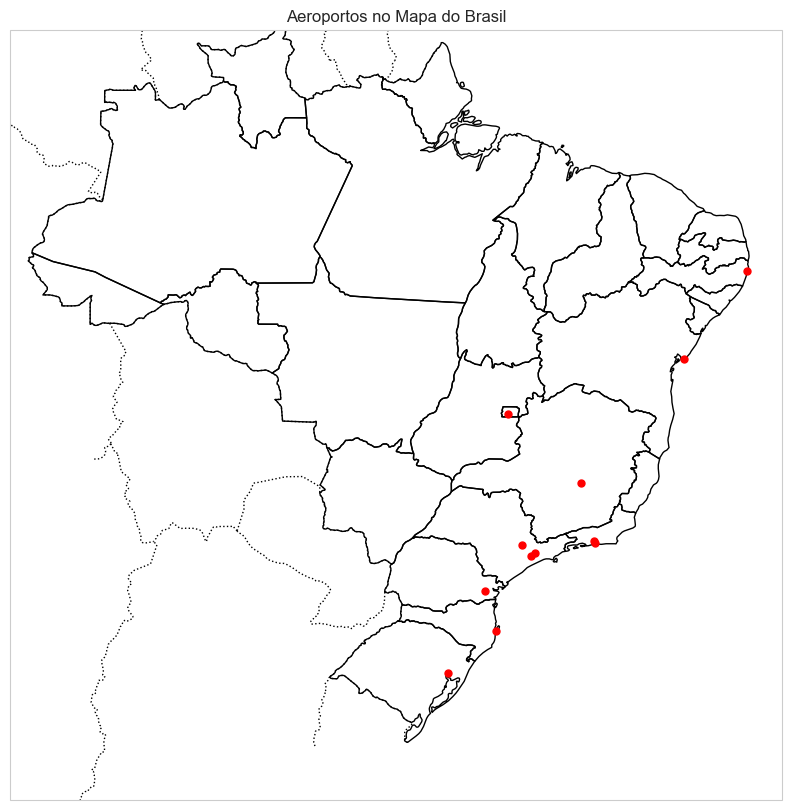

In [23]:
# Criação do mapa
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -33, -35, 5])  # Define a extensão do mapa para cobrir o Brasil


# Adiciona fronteiras dos estados do Brasil como referência
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')

# Plota os pontos no mapa
for aeroporto, coordenadas in AEROPORTOS.items():
    lat, lon = coordenadas
    ax.plot(lon, lat, 'ro', markersize=5)  # 'ro' indica ponto vermelho
    #ax.text(lon + 0.2, lat, aeroporto, fontsize=12, va='center', ha='left', color='black')
# Título e rótulos dos eixos
plt.title('Aeroportos no Mapa do Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostra o mapa
plt.show()


# BIMTRA

## Import do dataset pela API

In [24]:
# Pega o df do BIMTRA da API
df_bimtra_raw = request_api(endpoint='bimtra', inicial_date = '2022-06-01', final_date ='2023-05-13')

In [26]:

df_bimtra = df_bimtra_raw.copy()

# Cálculo da duração do voo
df_bimtra['deltaT'] = df_bimtra['dt_arr']-df_bimtra['dt_dep']

# Cálculo da distancia entre as coordenadas do aeroporto
df_bimtra['distance'] = df_bimtra.apply(calcular_distancia, axis=1)

## Transforma os datetimes

#df_bimtra[['dt_dep','dt_arr']] = df_bimtra[['dt_dep','dt_arr']]/1000

#df_bimtra['dt_dep'] = pd.to_datetime(df_bimtra['dt_dep'], unit ='s')

#df_bimtra['dt_arr'] = pd.to_datetime(df_bimtra['dt_arr'], unit ='s')

df_bimtra

,flightid,origem,destino,dt_dep,dt_arr,deltaT,distance
0,fcb2bf90345705318213ae1307c0f901,SBKP,SBRJ,1654044297000,1654046760000,2463000,406.747989
1,c7c5c10716335b048f86d8c52fcba3f2,SBGR,SBRJ,1654045021000,1654047173000,2152000,342.948013
2,3162de7203a972f071d5a48e8f0f4828,SBBR,SBRJ,1654043212000,1654047825000,4613000,928.188661
3,8fcd243e9b9eebbe62ab145ce04b6ab5,SBKP,SBCF,1654045120000,1654047701000,2581000,498.208232
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,1654045238000,1654050785000,5547000,1007.982120
...,...,...,...,...,...,...,...
300342,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,1683980059000,1683987623000,7564000,1654.523543
300343,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,1683970395000,1683975521000,5126000,854.437636
300344,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,1683996833000,1684004424000,7591000,1608.642575
300345,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,1683955738000,1683964481000,8743000,1450.625163


## Análise Exploratória do BIMTRA

In [27]:
df_bimtra.describe()

,dt_dep,dt_arr,deltaT,distance
count,3.003470e+05,3.003470e+05,3.003470e+05,300347.000000
mean,1.669844e+12,1.669848e+12,4.621902e+06,811.988306
std,8.757761e+09,8.757739e+09,2.505950e+06,509.731288
min,1.654042e+12,1.654044e+12,-8.421900e+07,0.000000
25%,1.662243e+12,1.662247e+12,2.963000e+06,373.769188
50%,1.670161e+12,1.670166e+12,4.066000e+06,649.950700
75%,1.677761e+12,1.677766e+12,5.364000e+06,928.188661
max,1.684019e+12,1.684022e+12,7.382100e+07,2963.098461


Percebe-se que existem distancias iguais a zero e durações do voo negativas. Vamos checar esses casos específicos

In [28]:
display(df_bimtra[(df_bimtra['deltaT']<0)].head(10))

num_deltaT_negativos = len(df_bimtra[df_bimtra['deltaT'] < 0])
total_registros = len(df_bimtra)
porcentagem_deltaT_negativos = num_deltaT_negativos / total_registros

print(f'O número de deltaT negativos encontrados é de: {num_deltaT_negativos}')
print(f'Isso representa {porcentagem_deltaT_negativos:.2%} do total de registros.')

display(df_bimtra[(df_bimtra['distance']==0)].head(10))

num_distance_zero = len(df_bimtra[df_bimtra['distance']==0])
porcentagem_distance_zero = num_distance_zero / total_registros

print(f'O número de distancias iguais a zero encontradas é de: {num_distance_zero}')
print(f'Isso representa {porcentagem_distance_zero:.2%} do total de registros.')


,flightid,origem,destino,dt_dep,dt_arr,deltaT,distance
959,8b3f12d8ed9e058f3376775871eedb0b,SBRF,SBGR,1654155636000,1654154272000,-1364000,2100.572404
1293,aef3f7cf8b6978a497133ea80e0c86fc,SBSP,SBFL,1654190114000,1654187529000,-2585000,488.073154
1550,310b5374273eb182ca50015a2563ac65,SBRJ,SBSP,1654300104000,1654298716000,-1388000,365.627841
1619,49d1f882d1db81ea17aa7854b0e5fab9,SBRJ,SBSP,1654300104000,1654216563000,-83541000,365.627841
1620,8d8998b8f3da5d2367b6b5ce84258ead,SBRJ,SBSP,1654298696000,1654216563000,-82133000,365.627841
1621,a8682cab7acc8720963b1bcf100e8e14,SBFL,SBSP,1654300317000,1654217151000,-83166000,488.073154
4349,c53415ceb04663810181ae92fe8ba516,SBSP,SBRF,1654536004000,1654531431000,-4573000,2129.453410
7299,861e95c8f77804754bff70210f81f6f4,SBCT,SBSP,1654879740000,1654878591000,-1149000,331.045035
9357,11731e7f82a2493fb6a763b285582561,SBRF,SBCF,1655102331000,1655098540000,-3791000,1608.642575
10583,38ff8fe74f4bdd2b3e2e18de16408c88,SBRJ,SBGR,1655197858000,1655197397000,-461000,342.948013


O número de deltaT negativos encontrados é de: 337
Isso representa 0.11% do total de registros.


,flightid,origem,destino,dt_dep,dt_arr,deltaT,distance
2352,795107b06c39dd916e04138ac9f61e27,SBGR,SBGR,1654283572000,1654287802000,4230000,0.0
5499,3bbc6a7af2bd163ff15ed954c594cbf9,SBGR,SBGR,1654702206000,1654704369000,2163000,0.0
5500,2cf075027517d5d0f5de3bef4e86de7b,SBGR,SBGR,1654702206000,1654705475000,3269000,0.0
5696,3bbc6a7af2bd163ff15ed954c594cbf9,SBGR,SBGR,1654702206000,1654704369000,2163000,0.0
9024,49809fc8ed38cc7e6d3db0dcff5bc21c,SBKP,SBKP,1655057647000,1655062706000,5059000,0.0
13742,c425dd37f58e399af3b920076b15c177,SBGR,SBGR,1655664063000,1655667137000,3074000,0.0
15801,640c1a1a2617500b20791a2dcdd7aafc,SBCF,SBCF,1655927131000,1655932244000,5113000,0.0
15873,ea9caada4594ca4e77f262cb3803b085,SBCF,SBCF,1655927131000,1655932983000,5852000,0.0
15874,640c1a1a2617500b20791a2dcdd7aafc,SBCF,SBCF,1655927131000,1655932244000,5113000,0.0
22112,92f69135384dcbed1c30986b644c2ca9,SBGR,SBGR,1656614419000,1656622313000,7894000,0.0


O número de distancias iguais a zero encontradas é de: 228
Isso representa 0.08% do total de registros.


É notado, observando o dataset, que parecem ser apenas erros de aquisição de dados sem sentidos aparentes. Além disso eles representam parte insignificante nos dados. Sendo assim, irão ser descartados do dataset

In [29]:
# Filtrando o dataset para remoção das condições encontradas
df_bimtra = df_bimtra[(df_bimtra['deltaT']>=0)&(df_bimtra['distance']>0)]

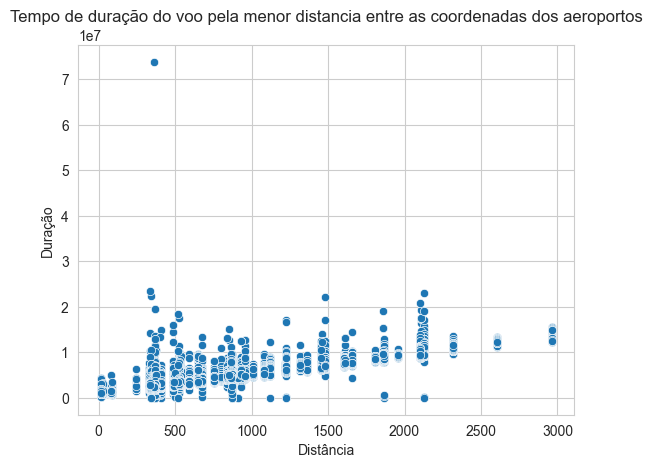

In [31]:
sns.scatterplot(data= df_bimtra, x='distance', y='deltaT').set(title = 'Tempo de duração do voo pela menor distancia entre as coordenadas dos aeroportos', xlabel='Distância', ylabel='Duração')
plt.show()

# CAT-62


In [23]:
# Pega o df do BIMTRA da API
df_cat62 = request_api(endpoint='cat-62', inicial_date ='2022-12-01 00:00:00.000', final_date ='2022-12-02 00:00:00.000')

df_cat62


,flightid,lat,lon,flightlevel,speed,dt_radar
0,5385ee71712e2767734b1a22ba578608,-0.514713,-0.889700,130.0,196.0,1669862641000
1,5385ee71712e2767734b1a22ba578608,-0.425949,-0.839414,170.0,263.0,1669867742000
2,5385ee71712e2767734b1a22ba578608,-0.439366,-0.849092,170.0,261.0,1669866960000
3,5385ee71712e2767734b1a22ba578608,-0.458496,-0.859771,170.0,257.0,1669865943000
4,5385ee71712e2767734b1a22ba578608,-0.505833,-0.887222,180.0,215.0,1669863182000
...,...,...,...,...,...,...
123592,707d489f28dad61fd05a083a45d835b0,-0.411834,-0.782337,300.0,376.0,1669887786000
123593,707d489f28dad61fd05a083a45d835b0,-0.404333,-0.763283,282.0,455.0,1669887183000
123594,707d489f28dad61fd05a083a45d835b0,-0.416969,-0.800194,160.0,301.0,1669888381000
123595,707d489f28dad61fd05a083a45d835b0,-0.420147,-0.804702,126.0,263.0,1669888621000


# ESPERAS

## Duvidas

Esperas? Que diabos é isso?

In [6]:
# Pega o df do ESPERAS DE VOOS da API
df_esperas = request_api(endpoint='esperas', inicial_date = '2022-12-01', final_date ='2023-01-01')

df_esperas[df_esperas['esperas']!=0]

,esperas,hora,aero
8,1,1669881600000,SBBR
10,2,1669888800000,SBBR
20,1,1669924800000,SBBR
134,1,1670335200000,SBBR
160,1,1670428800000,SBBR
...,...,...,...
8439,2,1672585200000,SBSP
8440,1,1672588800000,SBSP
8799,4,1671116400000,SBSV
8914,1,1671530400000,SBSV


# METAF

## Separar em colunas os dados

In [31]:
# Pega o df do ESPERAS DE VOOS da API
df_metaf = request_api(endpoint='metaf',inicial_date = '2022-06-01', final_date ='2023-05-13')





df_metaf['data_hora'] = df_metaf['metaf'].str.extract(r'(\d{6}Z)')
df_metaf['vento'] = df_metaf['metaf'].str.extract(r'(\d{5}KT)')
df_metaf['cavok'] = df_metaf['metaf'].str.contains('CAVOK', case=False)
df_metaf['temp'] = df_metaf['metaf'].str.extract(r'(\d{2}/\d{2})')
df_metaf[['temperatura', 'temp_orvalho']] = df_metaf['temp'].str.split('/', expand=True)
df_metaf['pressao'] = df_metaf['metaf'].str.extract(r'Q(\d{4})')
df_metaf['direcao'] = df_metaf['vento'].str.extract(r'(\d{3})\d{2}KT')
df_metaf['velocidade'] = df_metaf['vento'].str.extract(r'\d{3}(\d{2})KT')
df_metaf

,hora,metaf,aero,data_hora,vento,cavok,temp,temperatura,temp_orvalho,pressao,direcao,velocidade
0,1659657600000,METAF SBBR 050000Z 05006KT CAVOK 18/04 Q1014=\n,SBBR,050000Z,05006KT,True,18/04,18,04,1014,050,06
1,1659661200000,METAF SBBR 050100Z 01006KT CAVOK 17/05 Q1016=\n,SBBR,050100Z,01006KT,True,17/05,17,05,1016,010,06
2,1659664800000,METAF SBBR 050200Z 35008KT CAVOK 17/05 Q1014=\n,SBBR,050200Z,35008KT,True,17/05,17,05,1014,350,08
3,1659668400000,METAF SBBR 050300Z 34007KT CAVOK 16/05 Q1015=\n,SBBR,050300Z,34007KT,True,16/05,16,05,1015,340,07
4,1659672000000,METAF SBBR 050400Z 34008KT CAVOK 16/05 Q1015=\n,SBBR,050400Z,34008KT,True,16/05,16,05,1015,340,08
...,...,...,...,...,...,...,...,...,...,...,...,...
43933,1684004400000,METAF SBSP 131900Z 14010KT 9999 OVC024 ...,SBSP,131900Z,14010KT,False,18/11,18,11,1017,140,10
43934,1684008000000,METAF SBSP 132000Z 14009KT 9999 BKN033 ...,SBSP,132000Z,14009KT,False,17/11,17,11,1018,140,09
43935,1684011600000,METAF SBSP 132100Z 14008KT 8000 OVC033 ...,SBSP,132100Z,14008KT,False,16/12,16,12,1018,140,08
43936,1684015200000,METAF SBSP 132200Z 14007KT 7000 OVC033 ...,SBSP,132200Z,14007KT,False,15/12,15,12,1019,140,07


# METAR

In [8]:
# Pega o df do ESPERAS DE VOOS da API
df_metar = request_api(endpoint='metar', inicial_date = '2022-12-01', final_date ='2023-01-01')

df_metar

,hora,metar,aero
0,1669852800000,METAR SBBR 010000Z 28004KT 9999 FEW045 20/17 Q...,SBBR
1,1669856400000,METAR SBBR 010100Z 29004KT 9999 FEW045 20/17 Q...,SBBR
2,1669860000000,METAR SBBR 010200Z 30004KT 9999 FEW045 20/17 Q...,SBBR
3,1669863600000,METAR SBBR 010300Z 32003KT CAVOK 19/17 Q1013=,SBBR
4,1669867200000,METAR SBBR 010400Z 30004KT CAVOK 18/16 Q1021=,SBBR
...,...,...,...
9953,1672599600000,METAR SBSV 011900Z 12012KT 9999 SCT020 FEW023T...,SBSV
9954,1672603200000,METAR SBSV 012000Z 12010KT 090V200 9999 SCT020...,SBSV
9955,1672606800000,METAR SBSV 012100Z 12009KT 9999 SCT020 SCT080 ...,SBSV
9956,1672610400000,METAR SBSV 012200Z 11007KT 060V170 9999 SCT020...,SBSV


# SATELITE

In [12]:
# Pega o df do ESPERAS DE VOOS da API
df_satelite = request_api(endpoint='satelite', inicial_date = '2022-12-01', final_date ='2023-01-01')

df_satelite

,data,path,tamanho
0,2022-12-01 01:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1794990
1,2022-12-01 02:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1794153
2,2022-12-01 03:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1795192
3,2022-12-01 04:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1788387
4,2022-12-01 05:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1775104
...,...,...,...
745,2023-01-01 19:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1890961
746,2023-01-01 20:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1888224
747,2023-01-01 21:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1868914
748,2023-01-01 22:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1848443


# TC Prev


In [16]:
# Pega o df do ESPERAS DE VOOS da API
df_tcprev = request_api(endpoint='tc-prev', inicial_date = '2022-12-01', final_date ='2023-01-01')

df_tcprev

,hora,troca,aero
0,1669852800000,0,BR
1,1669856400000,0,BR
2,1669860000000,0,BR
3,1669863600000,0,BR
4,1669867200000,0,BR
...,...,...,...
9211,1672599600000,0,SV
9212,1672603200000,0,SV
9213,1672606800000,0,SV
9214,1672610400000,0,SV


# TC Real

In [17]:
# Pega o df do ESPERAS DE VOOS da API
df_tcreal = request_api(endpoint='tc-real', inicial_date = '2022-12-01', final_date ='2023-01-01')

df_tcreal

,hora,nova_cabeceira,antiga_cabeceira,aero
0,1669852980000,17R,29L,SP
1,1669853167000,29L,17R,BR
2,1669879565000,32,14,FL
3,1669880089000,33,15,KP
4,1669900092000,20L,21,RJ
...,...,...,...,...
3025,1672611088000,15,33,CT
3026,1672612272000,15,34,KP
3027,1672612479000,10,17,SV
3028,1672613222000,17,10,SV
